E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.657953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.656377
[3]	valid_0's binary_logloss: 0.655634
[4]	valid_0's binary_logloss: 0.654013
[5]	valid_0's binary_logloss: 0.652342
[6]	valid_0's binary_logloss: 0.650708
[7]	valid_0's binary_logloss: 0.649481
[8]	valid_0's binary_logloss: 0.647997
[9]	valid_0's binary_logloss: 0.646439
[10]	valid_0's binary_logloss: 0.644922
[11]	valid_0's binary_logloss: 0.643554
[12]	valid_0's binary_logloss: 0.642138
[13]	valid_0's binary_logloss: 0.640881
[14]	valid_0's binary_logloss: 0.639838
[15]	valid_0's binary_logloss: 0.638424
[16]	valid_0's binary_logloss: 0.637194
[17]	valid_0's binary_logloss: 0.63586
[18]	valid_0's binary_logloss: 0.634545
[19]	valid_0's binary_logloss: 0.633369
[20]	valid_0's binary_logloss: 0.632338
[21]	valid_0's binary_logloss: 0.631136
[22]	valid_0's binary_logloss: 0.62993
[23]	valid_0's binary_logloss: 0.628665
[24]	valid_0's binary_logloss:

[207]	valid_0's binary_logloss: 0.548505
[208]	valid_0's binary_logloss: 0.548356
[209]	valid_0's binary_logloss: 0.548204
[210]	valid_0's binary_logloss: 0.548122
[211]	valid_0's binary_logloss: 0.547963
[212]	valid_0's binary_logloss: 0.547858
[213]	valid_0's binary_logloss: 0.547775
[214]	valid_0's binary_logloss: 0.547638
[215]	valid_0's binary_logloss: 0.547566
[216]	valid_0's binary_logloss: 0.547412
[217]	valid_0's binary_logloss: 0.5473
[218]	valid_0's binary_logloss: 0.547156
[219]	valid_0's binary_logloss: 0.547038
[220]	valid_0's binary_logloss: 0.546985
[221]	valid_0's binary_logloss: 0.546936
[222]	valid_0's binary_logloss: 0.546814
[223]	valid_0's binary_logloss: 0.546672
[224]	valid_0's binary_logloss: 0.546599
[225]	valid_0's binary_logloss: 0.546512
[226]	valid_0's binary_logloss: 0.546383
[227]	valid_0's binary_logloss: 0.546271
[228]	valid_0's binary_logloss: 0.546196
[229]	valid_0's binary_logloss: 0.546048
[230]	valid_0's binary_logloss: 0.545982
[231]	valid_0's bi

[411]	valid_0's binary_logloss: 0.538955
[412]	valid_0's binary_logloss: 0.538934
[413]	valid_0's binary_logloss: 0.538889
[414]	valid_0's binary_logloss: 0.538884
[415]	valid_0's binary_logloss: 0.538888
[416]	valid_0's binary_logloss: 0.538898
[417]	valid_0's binary_logloss: 0.538907
[418]	valid_0's binary_logloss: 0.538891
[419]	valid_0's binary_logloss: 0.538863
[420]	valid_0's binary_logloss: 0.538859
[421]	valid_0's binary_logloss: 0.53883
[422]	valid_0's binary_logloss: 0.538835
[423]	valid_0's binary_logloss: 0.538844
[424]	valid_0's binary_logloss: 0.538845
[425]	valid_0's binary_logloss: 0.538834
[426]	valid_0's binary_logloss: 0.538829
[427]	valid_0's binary_logloss: 0.538827
[428]	valid_0's binary_logloss: 0.538818
[429]	valid_0's binary_logloss: 0.53881
[430]	valid_0's binary_logloss: 0.538809
[431]	valid_0's binary_logloss: 0.538819
[432]	valid_0's binary_logloss: 0.53881
[433]	valid_0's binary_logloss: 0.538813
[434]	valid_0's binary_logloss: 0.538816
[435]	valid_0's bin

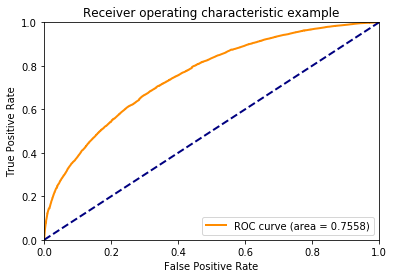

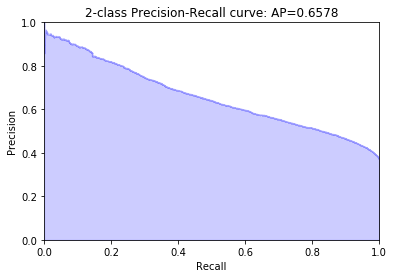

In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def draw_PR_curve(recall,precision,average_precision):
    """
    绘制PR曲线
    """
    step_kwargs = ({'step':'post'}
                  if 'step' in signature(plt.fill_between).parameters
                  else {})
    plt.step(recall,precision,color = 'b',alpha = 0.2, where = 'post')

    plt.fill_between(recall,precision,alpha = 0.2, color = 'b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
    plt.show()
def draw_ROC (r,c,AUC):
    """
    绘制ROC图像
    """
    lw = 2
    plt.plot(r, c, color='darkorange',
             lw=lw, label='ROC curve (area = {0:0.4f})'.format(AUC))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

X = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_train_sample_100k_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/OGeek/22_train_sample_100k_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_vali_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_vali_y.csv')

#X = X.append(test)
#y = y.append(test_y)

#test = X[130000:]
#test_y = y[130000:]

#X = X[0:130000]
#y = y[0:130000]

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)


lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_test,y_test,reference=lgb_train)
 
params = {
    'task':'train',
    'boosting_type':'gbdt',
    'objective':'regression',
    'metric':'binary_logloss',
    'num_leaves':100,
    'learning_rate':0.01,
    'feature_fraction':0.8,
#    'bagging_fraction':0.8,
    'bagging_freq':5,
    'verbose':0,
    'num_boost_round': 1000,
    'max_depth':20,
    'num_leaves':800
}

gbm = lgb.train(params,lgb_train,num_boost_round=100,valid_sets=lgb_eval,early_stopping_rounds=5)
 
pred = gbm.predict(test,num_iteration=gbm.best_iteration)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Threshold = 0.5
Pred = np.zeros(pred.shape[0])
for i in range(0,pred.shape[0]):
    if pred[i] < Threshold:
        Pred[i] = 0
    else:
        Pred[i] = 1
        
C = confusion_matrix(test_y,Pred)
print(classification_report(test_y,Pred))
print('confusion matrix:')
print(C)

             precision    recall  f1-score   support

          0       0.72      0.87      0.79     31414
          1       0.67      0.44      0.53     18585

avg / total       0.70      0.71      0.69     49999

confusion matrix:
[[27386  4028]
 [10474  8111]]


In [73]:
Threshold = 0.42
Pred = np.zeros(pred.shape[0])
for i in range(0,pred.shape[0]):
    if pred[i] < Threshold:
        Pred[i] = 0
    else:
        Pred[i] = 1
        
C = confusion_matrix(test_y,Pred)
print(classification_report(test_y,Pred))
print('confusion matrix:')
print(C)

             precision    recall  f1-score   support

          0       0.76      0.77      0.76     31414
          1       0.60      0.59      0.60     18585

avg / total       0.70      0.70      0.70     49999

confusion matrix:
[[24056  7358]
 [ 7586 10999]]


In [2]:
test = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_test_x.csv')
pred = gbm.predict(test,num_iteration=gbm.best_iteration)

P = []
thre = 0.5
for i in range(0,test.shape[0]):
    if pred[i] < thre:
        P.append(0)
    else:
        P.append(1)
P = pd.DataFrame({'pred':P})
P.to_csv('42_features_pre_100kmodel_lgb_0.5thres.csv', index = False,header = False)

In [75]:
test = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_test_x.csv')
pred = gbm.predict(test,num_iteration=gbm.best_iteration)

P = []
thre = 0.42
for i in range(0,test.shape[0]):
    if pred[i] < thre:
        P.append(0)
    else:
        P.append(1)
P = pd.DataFrame({'pred':P})
P.to_csv('42_features_pre_100kmodel_lgb.csv', index = False,header = False)

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.676851
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.676853
[3]	valid_0's binary_logloss: 0.676374
[4]	valid_0's binary_logloss: 0.676258
[5]	valid_0's binary_logloss: 0.67618
[6]	valid_0's binary_logloss: 0.67623
[7]	valid_0's binary_logloss: 0.67585
[8]	valid_0's binary_logloss: 0.675954
[9]	valid_0's binary_logloss: 0.676574
[10]	valid_0's binary_logloss: 0.676658
[11]	valid_0's binary_logloss: 0.676725
[12]	valid_0's binary_logloss: 0.676658
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.67585
Fit Complete!
(49999,)
<class 'numpy.ndarray'>


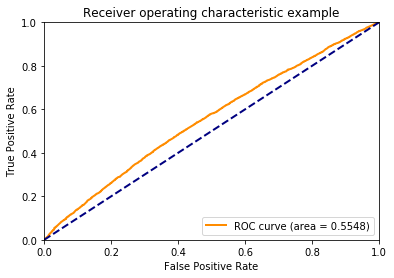

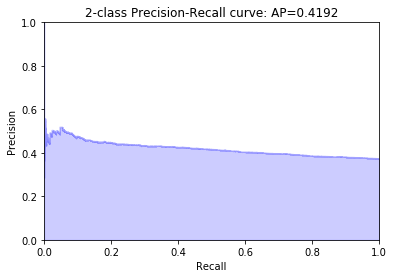

In [12]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def draw_PR_curve(recall,precision,average_precision):
    """
    绘制PR曲线
    """
    step_kwargs = ({'step':'post'}
                  if 'step' in signature(plt.fill_between).parameters
                  else {})
    plt.step(recall,precision,color = 'b',alpha = 0.2, where = 'post')

    plt.fill_between(recall,precision,alpha = 0.2, color = 'b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
    plt.show()
def draw_ROC (r,c,AUC):
    """
    绘制ROC图像
    """
    lw = 2
    plt.plot(r, c, color='darkorange',
             lw=lw, label='ROC curve (area = {0:0.4f})'.format(AUC))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

X = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_features_merge_0.05_sample_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_features_merge_0.05_sample_y.csv')

test = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_vali_x.csv')
test_y = pd.read_csv('C:/Users/76000/Desktop/OGeek/42_vali_y.csv')

#交叉检验，取训练集中的80%作为模型输入
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)


lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_test,y_test,reference=lgb_train)
 
params = {
    'task':'train',
    'boosting_type':'gbdt',
    'objective':'regression',
    'metric':'binary_logloss',
    'num_leaves':100,
    'learning_rate':0.05,
    'feature_fraction':0.8,
#    'bagging_fraction':0.8,
    'bagging_freq':5,
    'verbose':0,
    'num_boost_round': 1000,
    'max_depth':20,
    'num_leaves':800
}

gbm = lgb.train(params,lgb_train,num_boost_round=100,valid_sets=lgb_eval,early_stopping_rounds=5)
 
pred = gbm.predict(test,num_iteration=gbm.best_iteration)

print('Fit Complete!')
print(pred.shape)
print(type(pred))

precision, recall, threshold = precision_recall_curve(test_y,pred)
average_precision = average_precision_score(test_y,pred)
r, c, t = roc_curve(test_y, pred)
AUC = auc(r,c)

draw_ROC(r,c,AUC)
draw_PR_curve(recall,precision,average_precision)